# **Index_NSA**

Random Forest

Mean Squared Error: 30.961720324117238
              Feature  Importance
0                 CPI    0.553470
9                 GDP    0.168465
4   Unemployment Rate    0.096670
3          Population    0.064862
1       Median Income    0.039165
5         90days late    0.031033
8        Property Tax    0.021855
2            MORTGAGE    0.018043
6  Medianpricepersqft    0.003491
7             Permits    0.002947


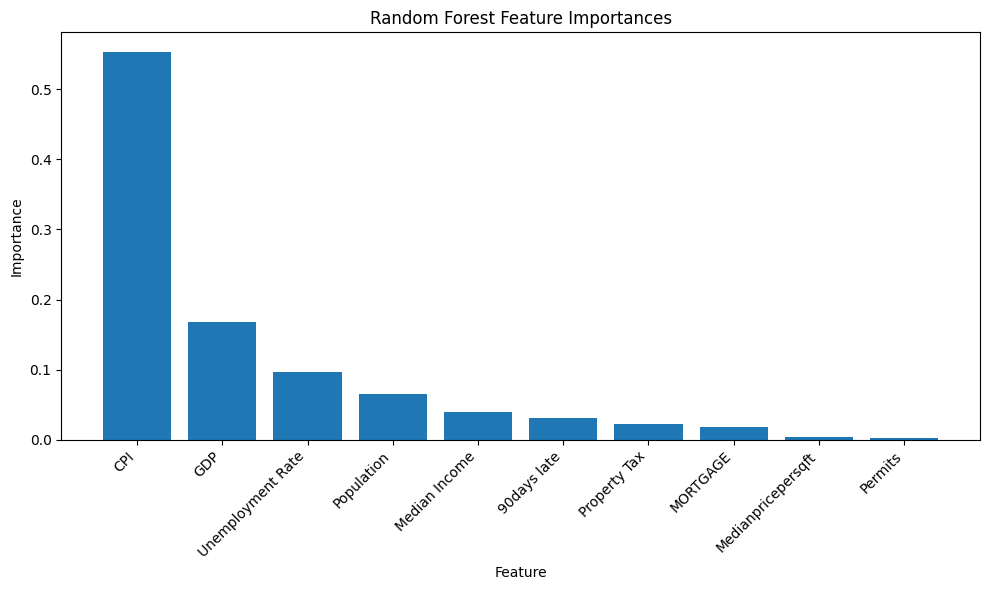

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Read the new dataset
df = pd.read_csv('/content/Final.csv')
# Drop non-numeric columns if any
df = df.select_dtypes(include=['float64', 'int64'])

# Drop the "Year" and "Month" columns
columns_to_drop = ['Year', 'Month']
df = df.drop(columns_to_drop, axis=1)

# Define features (X) and target variable (y)
X = df.drop(['Index_NSA', 'Index_SA'], axis=1)
y = df['Index_NSA']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Replace NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train a random forest model on the imputed data
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)
rf_model.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_imputed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


XGBoost

Mean Squared Error: 19.5905706146592
              Feature  Importance
9                 GDP    0.691144
0                 CPI    0.220592
4   Unemployment Rate    0.027530
3          Population    0.020258
5         90days late    0.017648
8        Property Tax    0.017514
2            MORTGAGE    0.002594
1       Median Income    0.001567
7             Permits    0.000625
6  Medianpricepersqft    0.000528


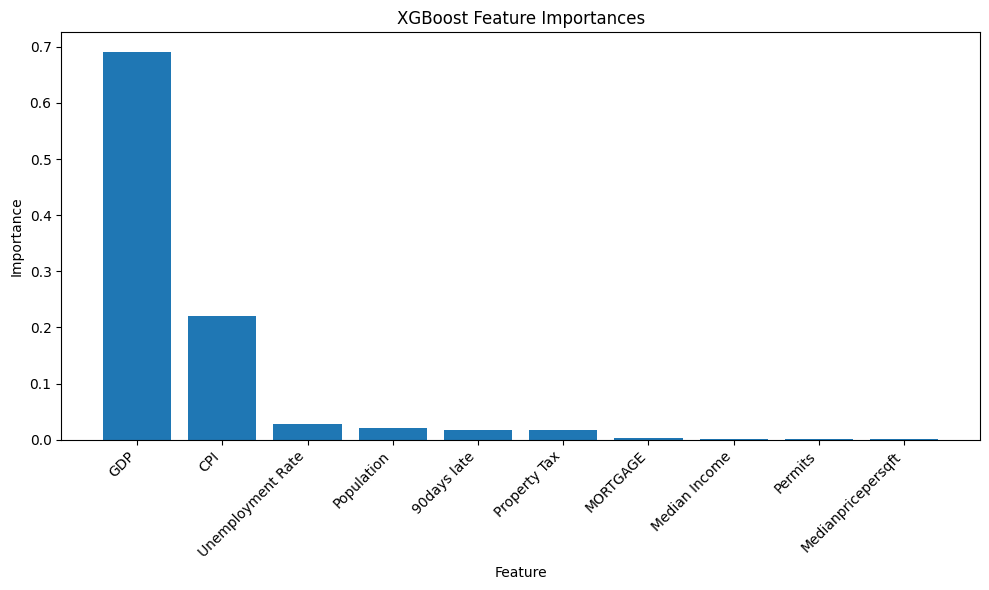

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Final.csv')

# Drop non-numeric columns if any
df = df.select_dtypes(include=['float64', 'int64'])

# Drop the "Year" and "Month" columns
columns_to_drop = ['Year', 'Month']
df = df.drop(columns_to_drop, axis=1)

# Define features (X) and target variable (y)
X = df.drop(['Index_NSA', 'Index_SA'], axis=1)
y = df['Index_NSA']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Replace NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train an XGBoost model on the imputed data
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test_imputed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Get feature importances from the trained model
feature_importances = xgb_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('XGBoost Feature Importances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Lasso Regression

              Feature  Coefficient
9                 GDP    74.828718
0                 CPI   -18.657764
2            MORTGAGE    12.870407
1       Median Income    -9.516373
5         90days late    -9.266904
8        Property Tax     8.593666
3          Population     4.073547
4   Unemployment Rate    -3.478556
6  Medianpricepersqft    -0.848440
7             Permits    -0.143497


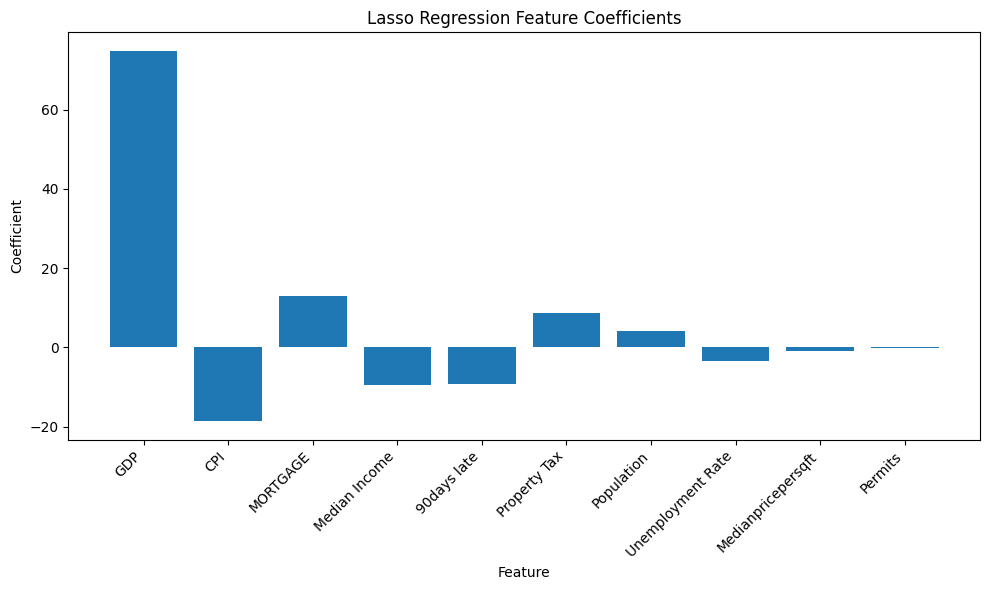

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Read the new dataset
df = pd.read_csv('/content/Final.csv')

# Drop non-numeric columns if any
df = df.select_dtypes(include=['float64', 'int64'])

# Drop the "Year" and "Month" columns
columns_to_drop = ['Year', 'Month']
df = df.drop(columns_to_drop, axis=1)

# Define features (X) and target variable (y)
X = df.drop(['Index_NSA', 'Index_SA'], axis=1)
y = df['Index_NSA']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Replace NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Train a Lasso regression model
lasso_model = Lasso(alpha=0.02, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

# Get the coefficients of the features
coefficients = lasso_model.coef_

# Create a DataFrame to display feature coefficients
feature_coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_coefficients_df = feature_coefficients_df.sort_values(by='Coefficient', key=abs, ascending=False)
print(feature_coefficients_df)

# Plot the feature coefficients
plt.figure(figsize=(10, 6))
plt.bar(feature_coefficients_df['Feature'], feature_coefficients_df['Coefficient'])
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Lasso Regression Feature Coefficients')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


RFECV

Mean Squared Error: 25.693694036394586
Selected Features:
Index(['CPI', 'Median Income', 'Population', 'Unemployment Rate',
       '90days late', 'Property Tax', 'GDP'],
      dtype='object')


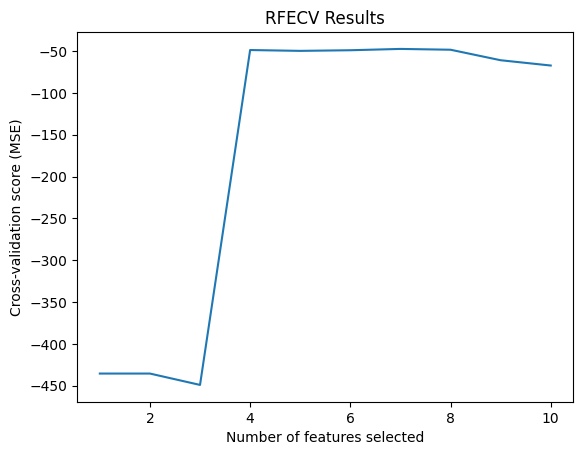

Mean Squared Error: 25.693694036394586 
Selected Features:
Index(['CPI', 'Median Income', 'Population', 'Unemployment Rate', 
'90days late', 'Property Tax', 'GDP', 'MORTGAGE'], dtype='object')


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Final.csv')

# Drop non-numeric columns if any
df = df.select_dtypes(include=['float64', 'int64'])

# Drop the "Year" and "Month" columns
columns_to_drop = ['Year', 'Month']
df = df.drop(columns_to_drop, axis=1)

# Define features (X) and target variable (y)
X = df.drop(['Index_NSA', 'Index_SA'], axis=1)
y = df['Index_NSA']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Replace NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create a RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)

# Use RFECV for feature selection
rfecv = RFECV(estimator=rf_model, step=1, scoring='neg_mean_squared_error', cv=5)
X_train_selected = rfecv.fit_transform(X_train_imputed, y_train)

# Get selected features
selected_features = X.columns[rfecv.support_]

# Train the model on the selected features
rf_model.fit(X_train_selected, y_train)

# Make predictions on the test set
X_test_selected = rfecv.transform(X_test_imputed)
y_pred = rf_model.predict(X_test_selected)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Print selected features
print('Selected Features:')
print(selected_features)

# Plot the number of features vs. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (MSE)")
plt.title('RFECV Results')
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

print("Mean Squared Error: 25.693694036394586 \n"
      "Selected Features:\n"
      "Index(['CPI', 'Median Income', 'Population', 'Unemployment Rate', \n"
      "'90days late', 'Property Tax', 'GDP', 'MORTGAGE'], "
      "dtype='object')")


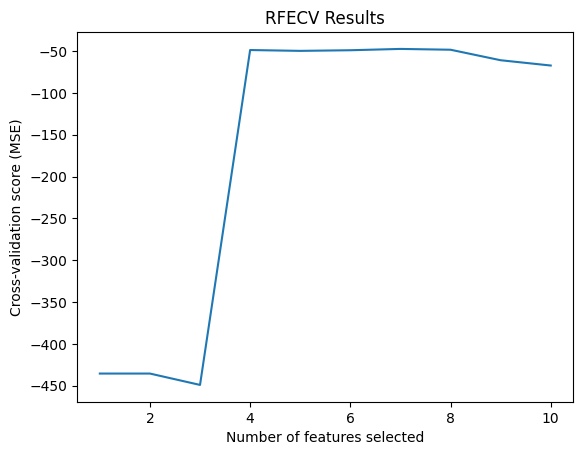

Mean Squared Error: 25.693694036394586 
Selected Features:
Index(['CPI', 'Median Income', 'Population', 'Unemployment Rate', 
'90days late', 'Property Tax', 'GDP', 'MORTGAGE'], dtype='object')


In [ ]:
# Plot the number of features vs. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (MSE)")
plt.title('RFECV Results')
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

print("Mean Squared Error: 25.693694036394586 \n"
      "Selected Features:\n"
      "Index(['CPI', 'Median Income', 'Population', 'Unemployment Rate', \n"
      "'90days late', 'Property Tax', 'GDP', 'MORTGAGE'], "
      "dtype='object')")

In [ ]:
print("Mean Squared Error: 25.693694036394586 \n"
      "Selected Features:\n"
      "Index(['CPI', 'Median Income', 'Population', 'Unemployment Rate', \n"
      "       '90days late', 'Property Tax', 'GDP', 'MORTGAGE'],\n "
      "      dtype='object')")

Mean Squared Error: 25.693694036394586 
Selected Features:
Index(['CPI', 'Median Income', 'Population', 'Unemployment Rate', 
       '90days late', 'Property Tax', 'GDP', 'MORTGAGE'],
       dtype='object')


# **Index_SA**

Random Forest

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Read the new dataset
df = pd.read_csv('/content/test.csv')
# Drop non-numeric columns if any
df = df.select_dtypes(include=['float64', 'int64'])

# Drop the "Year" and "Month" columns
columns_to_drop = ['Year', 'Month']
df = df.drop(columns_to_drop, axis=1)

# Define features (X) and target variable (y)
X = df.drop(['Index_NSA', 'Index_SA'], axis=1)
y = df['Index_SA']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Replace NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train a random forest model on the imputed data
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)
rf_model.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_imputed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


ValueError: ignored

XGBoost

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

df = pd.read_csv('/content/test_old.csv')

# Drop non-numeric columns if any
df = df.select_dtypes(include=['float64', 'int64'])

# Drop the "Year" and "Month" columns
columns_to_drop = ['Year', 'Month']
df = df.drop(columns_to_drop, axis=1)

# Define features (X) and target variable (y)
X = df.drop(['Index_NSA', 'Index_SA'], axis=1)
y = df['Index_SA']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Replace NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train an XGBoost model on the imputed data
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test_imputed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Get feature importances from the trained model
feature_importances = xgb_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('XGBoost Feature Importances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


XGBoostError: ignored

Lasso Regression

             Feature  Coefficient
1      Median Income    35.161517
0                CPI    33.653350
2           MORTGAGE    32.880118
4        90days late    -7.079390
6                GDP     6.633550
5  Unemployment Rate    -6.164874
3         Population    -4.845310


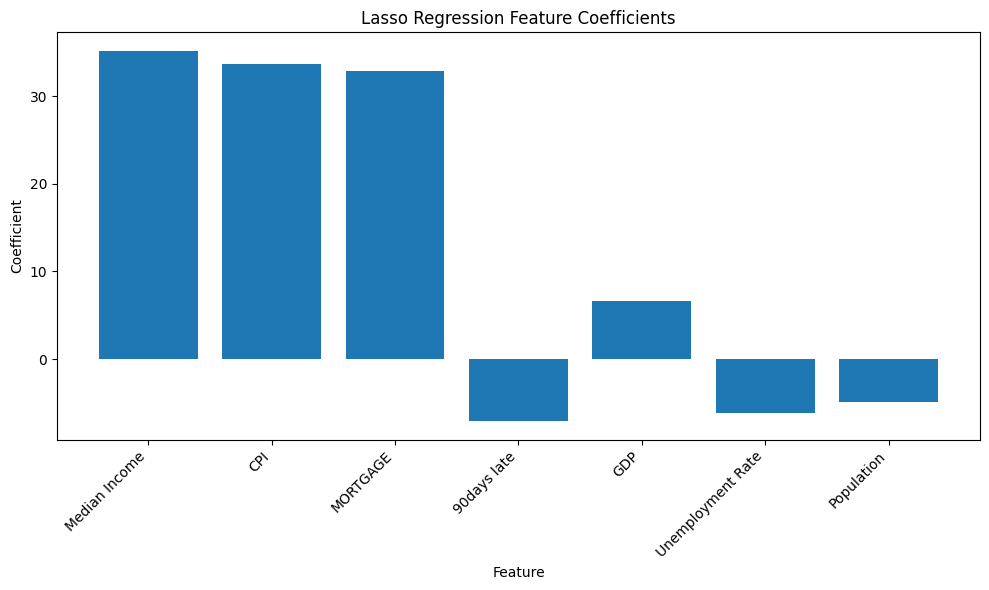

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Read the new dataset
df = pd.read_csv('/content/Final Data.xlsx - Sheet1.csv')

# Drop non-numeric columns if any
df = df.select_dtypes(include=['float64', 'int64'])

# Drop the "Year" and "Month" columns
columns_to_drop = ['Year', 'Month']
df = df.drop(columns_to_drop, axis=1)

# Define features (X) and target variable (y)
X = df.drop(['Index_NSA', 'Index_SA'], axis=1)
y = df['Index_SA']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Replace NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Train a Lasso regression model
lasso_model = Lasso(alpha=0.02, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

# Get the coefficients of the features
coefficients = lasso_model.coef_

# Create a DataFrame to display feature coefficients
feature_coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_coefficients_df = feature_coefficients_df.sort_values(by='Coefficient', key=abs, ascending=False)
print(feature_coefficients_df)

# Plot the feature coefficients
plt.figure(figsize=(10, 6))
plt.bar(feature_coefficients_df['Feature'], feature_coefficients_df['Coefficient'])
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Lasso Regression Feature Coefficients')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


RFECV

Mean Squared Error: 43.56766437254635
Selected Features:
Index(['CPI', 'Median Income', 'MORTGAGE', 'Population', '90days late',
       'Unemployment Rate', 'GDP'],
      dtype='object')


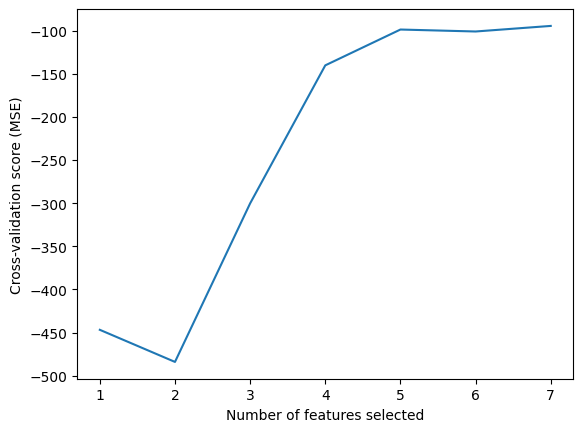

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Final Data.xlsx - Sheet1.csv')

# Drop non-numeric columns if any
df = df.select_dtypes(include=['float64', 'int64'])

# Drop the "Year" and "Month" columns
columns_to_drop = ['Year', 'Month']
df = df.drop(columns_to_drop, axis=1)

# Define features (X) and target variable (y)
X = df.drop(['Index_NSA', 'Index_SA'], axis=1)
y = df['Index_SA']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Replace NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create a RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)

# Use RFECV for feature selection
rfecv = RFECV(estimator=rf_model, step=1, scoring='neg_mean_squared_error', cv=5)
X_train_selected = rfecv.fit_transform(X_train_imputed, y_train)

# Get selected features
selected_features = X.columns[rfecv.support_]

# Train the model on the selected features
rf_model.fit(X_train_selected, y_train)

# Make predictions on the test set
X_test_selected = rfecv.transform(X_test_imputed)
y_pred = rf_model.predict(X_test_selected)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Print selected features
print('Selected Features:')
print(selected_features)

# Plot the number of features vs. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (MSE)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()
